In [79]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Text processing
import string
import re
import warnings
warnings.filterwarnings('ignore')

# Install and import nltk and upprade if necessary libraries
%pip install nltk
import nltk
%pip install --upgrade pandas
%pip install openpyxl --upgrade

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
# After reading the xsl file we find 4 missing values in the column 'Content'
df = pd.read_excel('df_complete_cleansing.xlsx')
df.head()
df.isna().sum()
  

SenderID             0
ReceiverID           0
ActionType           0
NegoOutcome          0
Content              4
Content_Length       0
Sentence_Count       0
Word_Count_nltk      0
NegoOutcomeLabel     0
Sentiment            0
SentimentCategory    0
dtype: int64

In [81]:
# Calculate the cumulative length of each exchanged message
df['Negotiation_Content_Length_sum'] = df.groupby(['SenderID', 'ReceiverID'])['Content_Length'].cumsum()

# Display df
#df

In [82]:
# Initialize a new column for negotiation length
df['Negotiation_Length'] = 0

# Function to calculate negotiation length
def calculate_negotiation_length(group):
    length = 0
    for i, row in group.iterrows():
        length += 1
        df.at[i, 'Negotiation_Length'] = length
        if row['ActionType'] in ['FinalAccept', 'FinalReject']:
            break

# Apply the function to each group of SenderID and ReceiverID
df.groupby(['SenderID', 'ReceiverID']).apply(calculate_negotiation_length)

# Display the DataFrame for verification focus on cell 6-7
#df.head(30)

""


SenderID 70 sent two counteroffers one after another is this an error in the system or is it possible since in the end he has a total of 8 sent messages and receiver 69 only 6. We will check if the sender id and receiver id follow the strict order of being a b a b instead of a a b a b a b b a. Cell 6 - 7 example.

In [83]:
import pandas as pd

# Count rows with missing values
na_rows = df[df['Content'].isna()]
print(na_rows)

      SenderID  ReceiverID    ActionType  NegoOutcome Content  Content_Length  \
552       2057        2058   FinalAccept  FinalAccept     NaN              29   
857       3457        3458  Counteroffer  FinalAccept     NaN               1   
1247       103         104         Offer  FinalAccept     NaN               8   
1404       133         134   FinalReject  FinalReject     NaN               1   

      Sentence_Count  Word_Count_nltk  NegoOutcomeLabel  Sentiment  \
552                1                5                 1        1.0   
857                1                1                 1        0.0   
1247               1                3                 1        0.5   
1404               1                1                 0        0.0   

     SentimentCategory  Negotiation_Content_Length_sum  Negotiation_Length  
552           Positive                            1367                   3  
857            Neutral                               1                   1  
1247        

In [84]:
import pandas as pd

# Remove rows with NaN in Content
df = df.dropna(subset=['Content'])

# Remove rows with empty strings or insignificant content in Content
def is_insignificant_content(content):
    return content.strip() == '' or content.strip() == '.' or len(content.split()) == 1

df = df[~df['Content'].apply(is_insignificant_content)]

# Validate Content Length (optional, if Content_Length column is used)
df['Content_Length'] = df['Content'].apply(len)

### **<span style="color: orange;">Word Embeddings</span>**
Word embeddings are dense vector representations of words that capture semantic relationships between them. Unlike BoW and TF-IDF, word embeddings consider the context in which words appear. Popular word embedding techniques include:
- **Word2Vec**: Uses neural networks to learn word vectors based on their context in a large corpus.
- **GloVe (Global Vectors for Word Representation)**: Combines the advantages of matrix factorization and context-based learning.
- **FastText**: An extension of Word2Vec that considers subword information, making it more robust to rare and misspelled words.

In [85]:
#%pip install scipy==1.12

In [86]:
import nltk
#nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download("word2vec_sample")

[nltk_data] Downloading package punkt to C:\Users\TColt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package word2vec_sample to
[nltk_data]     C:\Users\TColt/nltk_data...
[nltk_data]   Package word2vec_sample is already up-to-date!


True

In [87]:
#%pip install gensim

In [88]:
import gensim
from nltk.data import find

word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
pre_w2v_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

In [89]:
len(pre_w2v_model.key_to_index)

43981

In [90]:
len(pre_w2v_model['negotiation'])

300

In [91]:
pre_w2v_model.most_similar(positive=["negotiation"], topn=20)

[('negotiations', 0.8168568015098572),
 ('negotiating', 0.7531847357749939),
 ('bargaining', 0.6434566378593445),
 ('negotiate', 0.6341554522514343),
 ('negotiated', 0.6292652487754822),
 ('talks', 0.6133744716644287),
 ('discussions', 0.6095365881919861),
 ('dialogue', 0.5417248606681824),
 ('haggling', 0.5341888070106506),
 ('agreement', 0.501986026763916),
 ('impasse', 0.4880932867527008),
 ('consultations', 0.4769951105117798),
 ('discussion', 0.4654763638973236),
 ('compromise', 0.4547061026096344),
 ('Discussions', 0.4485512673854828),
 ('brinkmanship', 0.44761836528778076),
 ('agreements', 0.4455186426639557),
 ('ratification', 0.4414721131324768),
 ('preconditions', 0.435526579618454),
 ('tripartite', 0.4344906210899353)]

In [92]:
pre_w2v_model.most_similar(positive=["negotiation"], negative=["agreement"], topn=10)

[('diplomacy', 0.323906272649765),
 ('dialogue', 0.29187703132629395),
 ('Interviewing', 0.28622379899024963),
 ('politicking', 0.28376883268356323),
 ('tactful', 0.2724672555923462),
 ('debates', 0.2721523642539978),
 ('bargaining', 0.2721068263053894),
 ('negotiations', 0.270591139793396),
 ('circumlocution', 0.2700679302215576),
 ('brinkmanship', 0.2678378224372864)]

In [93]:
print(pre_w2v_model)

KeyedVectors<vector_size=300, 43981 keys>


In [94]:
pre_w2v_model["negotiation"]

array([ 0.00503933,  0.0736899 , -0.0289142 ,  0.0624547 ,  0.0555153 ,
       -0.00116173,  0.0282533 , -0.0617938 ,  0.0565066 ,  0.0799685 ,
       -0.105743  ,  0.0134658 , -0.0305665 ,  0.0114005 , -0.107065  ,
        0.0806294 ,  0.1183    ,  0.00462627,  0.0256097 , -0.0156963 ,
        0.00078481,  0.067081  ,  0.00380015,  0.0852556 ,  0.0328796 ,
        0.0591502 , -0.109709  , -0.073029  ,  0.00805467, -0.044941  ,
        0.00305665, -0.0213139 , -0.0421321 ,  0.0456018 ,  0.0859165 ,
        0.0627852 , -0.00082612,  0.00636113,  0.0684028 , -0.148041  ,
        0.041306  ,  0.0391581 , -0.0366797 ,  0.0156137 , -0.15465   ,
        0.0105743 ,  0.00328383,  0.0137962 , -0.136145  ,  0.0845947 ,
       -0.00850904, -0.00950039, -0.0489063 , -0.035358  , -0.016605  ,
        0.0342014 ,  0.0472541 ,  0.00570023,  0.0614634 ,  0.041306  ,
       -0.142754  ,  0.0555153 , -0.0290794 ,  0.1031    ,  0.0138788 ,
        0.0829425 ,  0.03321   ,  0.0345318 ,  0.027262  , -0.11

In [95]:
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Function to average word vectors for each document
def get_document_vector(text, model):
    tokens = nltk.word_tokenize(text)
    word_vectors = []
    for word in tokens:
        if word in model:
            word_vectors.append(model[word])
    if len(word_vectors) == 0:  # If no word vectors are found, return a zero vector
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)


In [96]:
# Apply to entire dataset
df['word2vec_embedding'] = df['Content'].apply(lambda x: get_document_vector(x, pre_w2v_model))

# **<span style="color: orange;">XGBoost Model</span>**

In [97]:
# Import necessary libraries
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score
import xgboost as xgb

In [98]:
# Convert the embeddings into a numpy array
X_xgb = np.array(df['word2vec_embedding'].tolist())
y_xgb = df['NegoOutcomeLabel'].values  # Target variabel

In [99]:
# Split data into training and testing sets
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.33, random_state=42, stratify=y_xgb)

In [100]:
# Initial XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [101]:
# Predict and evaluate the model
y_pred_test = xgb_model.predict(X_test_xgb)


In [102]:
# Print AUC score
print("ROC AUC: {:.4f}".format(roc_auc_score(y_test_xgb, y_pred_test)))

ROC AUC: 0.5799


In [103]:
# Classification report
print(classification_report(y_test_xgb, y_pred_test))

              precision    recall  f1-score   support

           0       0.56      0.25      0.34       239
           1       0.73      0.91      0.81       528

    accuracy                           0.71       767
   macro avg       0.65      0.58      0.58       767
weighted avg       0.68      0.71      0.66       767



In [104]:
# Hyperparameter tuning with GridSearchCV
parameters = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]

}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=parameters, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_xgb, y_train_xgb)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [105]:
# Use the best parameters
best_params = grid_search.best_params_
best_xgb_model = xgb.XGBClassifier(**best_params, random_state=42,use_label_encoder=False, eval_metric='logloss')
best_xgb_model.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [106]:
# Predict and evaluate the optimized model
y_pred_best = best_xgb_model.predict(X_test_xgb)

In [107]:
# Print accurcacy score
print("Accuracy: {:.4f}".format(accuracy_score(y_test_xgb, y_pred_best)))

Accuracy: 0.7184


In [108]:
# Print the best hyperparameters
print("\nBest Hyperparameters:")
print(grid_search.best_params_)


Best Hyperparameters:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}


In [109]:
# Evaluate the Model
print("XGBoostEvaluation:")
print(f"Training Accuracy: {xgb_model.score(X_train_xgb, y_train_xgb):.4f}")
print(f"Test Accuracy: {xgb_model.score(X_test_xgb, y_test_xgb):.4f}")

XGBoostEvaluation:
Training Accuracy: 0.9994
Test Accuracy: 0.7053


In [110]:
# Generate and directly print the classification report
print(classification_report(y_test_xgb, y_pred_best))

              precision    recall  f1-score   support

           0       0.62      0.24      0.35       239
           1       0.73      0.93      0.82       528

    accuracy                           0.72       767
   macro avg       0.68      0.59      0.58       767
weighted avg       0.70      0.72      0.67       767



In [111]:
# Save results to a DataFrame for later comparison
results_xgb = pd.DataFrame({
    'Model': ['XGBoost', 'XGBoost (Optimized)'],
    'Accuracy': [accuracy_score(y_test_xgb, y_pred_test), accuracy_score(y_test_xgb, y_pred_best)],
    'ROC AUC': [roc_auc_score(y_test_xgb, y_pred_test), roc_auc_score(y_test_xgb, y_pred_best)],
    'F1 Score': [f1_score(y_test_xgb, y_pred_test, average='weighted'), f1_score(y_test_xgb, y_pred_best, average='weighted')]
})

# **<span style="color: orange;">Naive Bayes</span>**

In [112]:
# Define features and target
X_nb = np.array(df['word2vec_embedding'].tolist())
y_nb = df['NegoOutcomeLabel'].values  # Target

In [113]:
# Split data into training and testing sets
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.33, random_state=42, stratify=y_nb)

In [114]:
from sklearn.naive_bayes import GaussianNB
# Initial GaussianNB model
gnb = GaussianNB()
gnb.fit(X_train_nb, y_train_nb)

GaussianNB()

In [115]:
y_pred_test = gnb.predict(X_test_nb)

In [116]:
# Step 5: Evaluate the Model
print("Naive Bayes Model Evaluation:")
print(f"Training Accuracy: {gnb.score(X_train_nb, y_train_nb):.4f}")
print(f"Test Accuracy: {gnb.score(X_test_nb, y_test_nb):.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test_nb, y_pred_test))

Naive Bayes Model Evaluation:
Training Accuracy: 0.5215
Test Accuracy: 0.5085
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.75      0.49       239
           1       0.78      0.40      0.53       528

    accuracy                           0.51       767
   macro avg       0.57      0.57      0.51       767
weighted avg       0.65      0.51      0.52       767



In [117]:
# Cross-Validation
cv_scores = cross_val_score(gnb, X_train_nb, y_train_nb, cv=10, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Accuracy Scores: [0.56410256 0.46153846 0.51923077 0.47435897 0.49358974 0.56410256
 0.48076923 0.51612903 0.49677419 0.53548387]
Mean CV Accuracy: 0.5106


In [118]:
# Hyperparameter Tuning
params = {'var_smoothing': np.logspace(0, -9, num=100)}
grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=params, scoring='accuracy', cv=10, verbose=1)
grid_search.fit(X_train_nb, y_train_nb)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [119]:
# Best Parameters and Score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Retrain with Best Parameters
gnb_best = GaussianNB(var_smoothing=grid_search.best_params_['var_smoothing'])
gnb_best.fit(X_train_nb, y_train_nb)
y_pred_best = gnb_best.predict(X_test_nb)

Best Hyperparameters: {'var_smoothing': 0.001873817422860383}
Best CV Score: 0.5112489660876758


In [120]:
# Evaluate the Model
print("Naive Bayes Model Evaluation:")
print(f"Training Accuracy: {gnb.score(X_train_nb, y_train_nb):.4f}")
print(f"Test Accuracy: {gnb.score(X_test_nb, y_test_nb):.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test_nb, y_pred_best))

Naive Bayes Model Evaluation:
Training Accuracy: 0.5215
Test Accuracy: 0.5085
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.75      0.49       239
           1       0.78      0.40      0.53       528

    accuracy                           0.51       767
   macro avg       0.57      0.57      0.51       767
weighted avg       0.65      0.51      0.51       767



In [121]:
# Save results to a DataFrame for later comparison
results_nb = pd.DataFrame({
    'Model': ['Naive Bayes', 'Naive Bayes (Optimized)'],
    'Accuracy': [accuracy_score(y_test_nb, y_pred_test), accuracy_score(y_test_nb, y_pred_best)],
    'ROC AUC': [roc_auc_score(y_test_nb, y_pred_test), roc_auc_score(y_test_nb, y_pred_best)],
    'F1 Score': [f1_score(y_test_nb, y_pred_test, average='weighted'), f1_score(y_test_nb, y_pred_best, average='weighted')]
})

# **<span style="color: orange;">Random Forest</span>**

In [122]:
# Define features and target
X_rf = np.array(df['word2vec_embedding'].tolist())
y_rf = df['NegoOutcomeLabel'].values  # Target

In [123]:
# Split data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.33, random_state=42, stratify=y_rf)

In [124]:
X_train_rf.shape, X_test_rf.shape

((1557, 300), (767, 300))

In [125]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

In [126]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

In [127]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Predict on test data
y_pred_rf = rf.predict(X_test_rf)

# Evaluate the model
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test_rf, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test_rf, y_pred_rf))
print("Classification Report:\n", classification_report(y_test_rf, y_pred_rf))

Random Forest Classifier
Accuracy: 0.7092568448500652
Confusion Matrix:
 [[ 33 206]
 [ 17 511]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.14      0.23       239
           1       0.71      0.97      0.82       528

    accuracy                           0.71       767
   macro avg       0.69      0.55      0.52       767
weighted avg       0.70      0.71      0.64       767



In [128]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(criterion='gini', random_state=42, n_estimators=100, n_jobs=-1, verbose=1)
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=params, scoring='accuracy', cv=10, verbose=1)
grid_search.fit(X_train_rf, y_train_rf)

# warnings can be ignored

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [129]:
rf_best = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rf_best.fit(X_train_rf, y_train_rf)

RandomForestClassifier(max_depth=15, n_estimators=200, random_state=42)

In [130]:
rfc_best_pred = rf_best.predict(X_test_rf)

In [131]:
# Save results to a DataFrame for later comparison
results_rf = pd.DataFrame({
    'Model': ['Random Forest', 'Ramdom Forest (Optimized)'],
    'Accuracy': [accuracy_score(y_test_rf, y_pred_rf),accuracy_score(y_test_rf, rfc_best_pred)],
    'ROC AUC': [roc_auc_score(y_test_rf, y_pred_rf), roc_auc_score(y_test_rf, rfc_best_pred)],
    'F1 Score': [f1_score(y_test_rf, y_pred_rf, average='weighted' ), f1_score(y_test_rf, rfc_best_pred, average='weighted')]
})


# **<span style="color: orange;">Logistic Regression</span>**

In [132]:
import numpy as np
import nltk
from nltk.data import find
import gensim
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [133]:
# Define features and target
X_log = np.array(df['word2vec_embedding'].tolist())
y_log = df['NegoOutcomeLabel'].values  # Target

In [134]:
# Split data into training and testing sets
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.33, random_state=42, stratify=y_log)

In [135]:
# Initialize and train Logistic Regression model
logreg = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
logreg.fit(X_train_log, y_train_log)


LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [136]:
# Predict on test set
y_pred_test = logreg.predict(X_test_log)

In [137]:
# Check if there's overfitting or underfitting by comparing the training and test accuracy scores
print(f"Training-set accuracy score: {logreg.score(X_train_log, y_train_log):.4f}")
print(f"Test-set accuracy score: {logreg.score(X_test_log, y_test_log):.4f}")

Training-set accuracy score: 0.6879
Test-set accuracy score: 0.6897


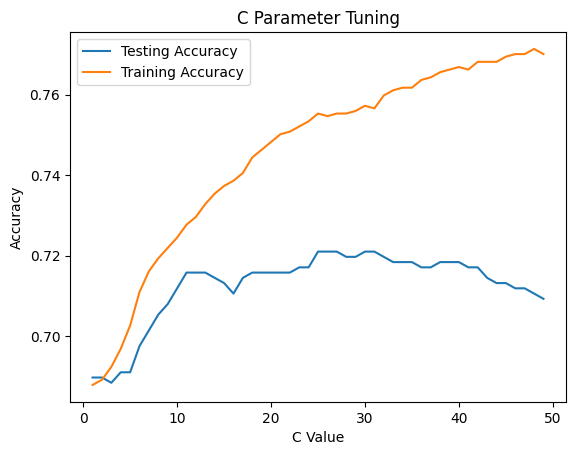

In [138]:
# Tuning the C parameter
section = np.arange(1, 50)
test_accuracy = np.empty(len(section))
train_accuracy = np.empty(len(section))
for i, k in enumerate(section): 
    logreg_tune = LogisticRegression(C=k, solver='liblinear', random_state=42)
    logreg_tune.fit(X_train_log, y_train_log)
    test_accuracy[i] = logreg_tune.score(X_test_log, y_test_log)
    train_accuracy[i] = logreg_tune.score(X_train_log, y_train_log)

# Plot the tuning results
plt.title('C Parameter Tuning')
plt.plot(section, test_accuracy, label='Testing Accuracy')
plt.plot(section, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.show()

In [139]:
# Logistic Regression with tuned C=5 (chosen from grid search)
logreg_best = LogisticRegression(C=5, solver='liblinear', random_state=42)
logreg_best.fit(X_train_log, y_train_log)


LogisticRegression(C=5, random_state=42, solver='liblinear')

In [140]:
# Predict with the best model
y_pred_best = logreg_best.predict(X_test_log)

In [141]:
# ROC AUC Score
roc_auc = roc_auc_score(y_test_log, y_pred_best)
print(f"ROC AUC Score: {roc_auc:.4f}")


ROC AUC Score: 0.5099


In [142]:
# Hyperparameter tuning using GridSearchCV
parameters = [{'penalty': ['l1', 'l2']}, {'C': [1, 5, 10, 100, 250, 1000]}]
grid_search = GridSearchCV(estimator=logreg_best, param_grid=parameters, cv=10, scoring='accuracy')
grid_search.fit(X_train_log, y_train_log)

GridSearchCV(cv=10,
             estimator=LogisticRegression(C=5, random_state=42,
                                          solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']},
                         {'C': [1, 5, 10, 100, 250, 1000]}],
             scoring='accuracy')

In [143]:
# Print out the best score and best parameters
print(f"Best GridSearchCV Score: {grid_search.best_score_:.4f}")
print(f"Best Parameters: {grid_search.best_params_}")


Best GridSearchCV Score: 0.7270
Best Parameters: {'C': 100}


In [144]:
# Best Model from GridSearchCV
best_logreg = grid_search.best_estimator_

In [145]:

# Predict with the best model
y_pred_best = best_logreg.predict(X_test_log)

In [146]:
# Evaluate performance
best_acc = accuracy_score(y_test_log, y_pred_best)
print(f"Best Model Test Accuracy: {best_acc:.4f}")

Best Model Test Accuracy: 0.7184


In [147]:
# Precision, Recall, and F1 Score
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test_log, y_pred_best)
recall = recall_score(y_test_log, y_pred_best)
f1 = f1_score(y_test_log, y_pred_best, average='weighted')

print(f"Best Model Precision: {precision:.4f}")
print(f"Best Model Recall: {recall:.4f}")
print(f"Best Model F1 Score: {f1:.4f}")

Best Model Precision: 0.7385
Best Model Recall: 0.9148
Best Model F1 Score: 0.6830


In [148]:
# Save results to a DataFrame for later comparison
results_logreg = pd.DataFrame({
    'Model': ['Logistic Regression', 'Logistic Regression (Optimized)'],
    'Accuracy': [accuracy_score(y_test_log, y_pred_test), accuracy_score(y_test_log, y_pred_best)],
    'ROC AUC': [roc_auc_score(y_test_log, y_pred_test), roc_auc_score(y_test_log, y_pred_best)],
    'F1 Score': [f1_score(y_test_log, y_pred_test, average='weighted'), f1_score(y_test_log, y_pred_best, average='weighted')]
})


# **<span style="color: orange;">Support Vector Machine</span>**

In [149]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import pandas as pd

In [150]:
# Define features and target
X_svm = np.array(df['word2vec_embedding'].tolist())
y_svm = df['NegoOutcomeLabel'].values  # Target

In [151]:
# Split data into training and testing sets
X_train_svm , X_test_svm , y_train_svm , y_test_svm  = train_test_split(X_svm , y_svm , test_size=0.33, random_state=42, stratify=y_svm )

In [152]:
# Fit base SVM model
svm = SVC(kernel='linear', C=1, gamma=0.1)
svm.fit(X_train_svm , y_train_svm)

SVC(C=1, gamma=0.1, kernel='linear')

In [153]:
# Predict with base SVM model
y_pred_svm = svm.predict(X_test_svm)

In [154]:
svm.support_vectors_

array([[-0.00091356,  0.0106026 ,  0.00625432, ..., -0.01555158,
         0.00690891, -0.01348384],
       [ 0.00263907,  0.0041727 , -0.00297562, ..., -0.01208484,
         0.00051047, -0.0139896 ],
       [ 0.00423644,  0.01621351, -0.00741059, ..., -0.002455  ,
         0.00507286, -0.01120498],
       ...,
       [ 0.01109724,  0.01624285,  0.00052078, ..., -0.01827362,
         0.02437423, -0.00719841],
       [ 0.00293934, -0.00364941, -0.00154785, ...,  0.00145069,
         0.00192027, -0.02481956],
       [ 0.00720133,  0.00073171,  0.01999776, ..., -0.00546571,
         0.01064643, -0.00289952]])

In [155]:
# Check if model overfits
print("Train set Accuracy: ", svm.score(X_train_svm, y_train_svm))
print("Test set Accuracy: ", svm.score(X_test_svm, y_test_svm))

Train set Accuracy:  0.6878612716763006
Test set Accuracy:  0.6883963494132985


In [156]:
# How good is the ROC based prediction?
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test_svm, y_pred_svm)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.5000


In [157]:
# What are the best parameters for the model?
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=SVC(), param_grid={'C': [1, 10], 'gamma': [0.1, 0.9], 'kernel': ['rbf', 'linear']})

grid_search.fit(X_train_svm, y_train_svm)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [0.1, 0.9],
                         'kernel': ['rbf', 'linear']})

In [158]:
# print out best possible parameters
print('Best parameters:', grid_search.best_params_)

# print out best score
print('Gridsearch CV best score:', grid_search.best_score_)

Best parameters: {'C': 10, 'gamma': 0.9, 'kernel': 'rbf'}
Gridsearch CV best score: 0.7045572594607965


In [159]:
#Modeling with the optimal parameters
best_svm = SVC(kernel='rbf', gamma=0.9, C=10)

#it classifier to training data
best_svm.fit(X_train_svm, y_train_svm)

#make new predictions
y1_pred = best_svm.predict(X_test_svm)

In [160]:
# Print results

print('train accuracy before:', svm.score(X_train_svm, y_train_svm))
print('test accuracy before:', svm.score(X_test_svm, y_test_svm))

print('train accuracy after:', best_svm.score(X_train_svm, y_train_svm))
print('test accuracy after:', best_svm.score(X_test_svm, y_test_svm))

train accuracy before: 0.6878612716763006
test accuracy before: 0.6883963494132985
train accuracy after: 0.7334617854849069
test accuracy after: 0.6962190352020861


In [161]:
# ROC of optimized model in comparison to previous model
ROC_AUC = roc_auc_score(y_test_svm, y_pred_svm)

print('ROC AUC before: {:.4f}'.format(ROC_AUC))

ROC_AUC1 = roc_auc_score(y_test_svm, y1_pred)

print('ROC AUC after: {:.4f}'.format(ROC_AUC1))

ROC AUC before: 0.5000
ROC AUC after: 0.5229


In [162]:
from sklearn.model_selection import cross_val_score

C_range = list(range(1, 26))
acc_score = []

# Cross validation with 10 folds
for c in C_range:
    svc = SVC(kernel= 'poly',C=c)
    scores = cross_val_score(svc, X_svm, y_svm, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())   
print(acc_score)

[0.69535481722658, 0.7099951901731537, 0.7117137783039811, 0.7104169749889004, 0.7095512061565784, 0.707832618025751, 0.7005198312860739, 0.7013837501849933, 0.6970789551576143, 0.6970752552908095, 0.6923412757140742, 0.6893295841349711, 0.6871799615213852, 0.6854576735237531, 0.6841701198756844, 0.6833154506437767, 0.6815950125795471, 0.6803019091312712, 0.6785814710670416, 0.6760045138375019, 0.675144294805387, 0.6729965221252036, 0.6712742341275715, 0.6699866804795028, 0.670415865028859]


Text(0, 0.5, 'Cross-Validated Accuracy')

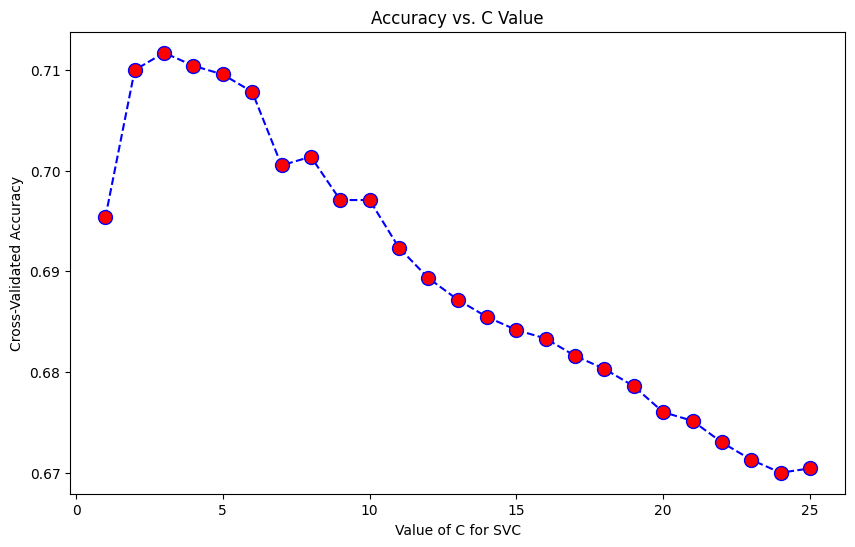

In [163]:
# visualize optimisation iteration
plt.figure(figsize=(10,6))
plt.plot(C_range,acc_score,color = 'blue',linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. C Value')
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [164]:
# Compute the cross-val scores for the model with default setting and our optimzed model

#Cross validation for model with default setting
scores = cross_val_score(svm, X= X_train_svm, y = y_train_svm, cv=10, n_jobs=1)
print("Cross-validation scores for default model: {}".format(scores))

#Cross validation for model with optimized setting
scores1 = cross_val_score(best_svm, X= X_train_svm, y = y_train_svm, cv=10, n_jobs=1)
print("Cross-validation scores for optimized model: {}".format(scores1))

Cross-validation scores for default model: [0.68589744 0.68589744 0.68589744 0.68589744 0.68589744 0.68589744
 0.69230769 0.69032258 0.69032258 0.69032258]
Cross-validation scores for optimized model: [0.69871795 0.73717949 0.69230769 0.71153846 0.70512821 0.69230769
 0.70512821 0.72258065 0.71612903 0.67096774]


In [165]:
# Print overall f1-score of the whole model
from sklearn.metrics import f1_score
f1_score(y_test_svm, y1_pred, average='weighted')

0.5977435216383165

In [166]:
# Save results to a DataFrame for later comparison
results_svm = pd.DataFrame({
    'Model': ['SVM', 'SVM (Optimized)'],
    'Accuracy': [accuracy_score(y_test_svm, y_pred_svm), accuracy_score(y_test_svm, y1_pred)],
    'ROC AUC': [roc_auc_score(y_test_svm, y_pred_svm), roc_auc_score(y_test_svm, y1_pred)],
    'F1 Score': [f1_score(y_test_svm, y_pred_svm, average='weighted'), f1_score(y_test_svm, y1_pred, average='weighted')]
})


# **<span style="color: orange;">Model Comparison</span>**

In [167]:
# Concatenate all model results into a single DataFrame
results_combined = pd.concat([results_xgb, results_nb, results_rf, results_svm, results_logreg], ignore_index=True)

In [168]:
results_combined

,Model,Accuracy,ROC AUC,F1 Score
0,XGBoost,0.705346,0.579870,0.664546
1,XGBoost (Optimized),0.718383,0.588195,0.673565
2,Naive Bayes,0.508475,0.574288,0.515358
3,Naive Bayes (Optimized),0.507171,0.573341,0.513882
4,Random Forest,0.709257,0.552939,0.636255
5,Ramdom Forest (Optimized),0.704042,0.536555,0.615263
6,SVM,0.688396,0.500000,0.561349
7,SVM (Optimized),0.696219,0.522858,0.597744
8,Logistic Regression,0.689700,0.502092,0.564379
9,Logistic Regression (Optimized),0.718383,0.599646,0.682990


In [169]:
#pip install plotly

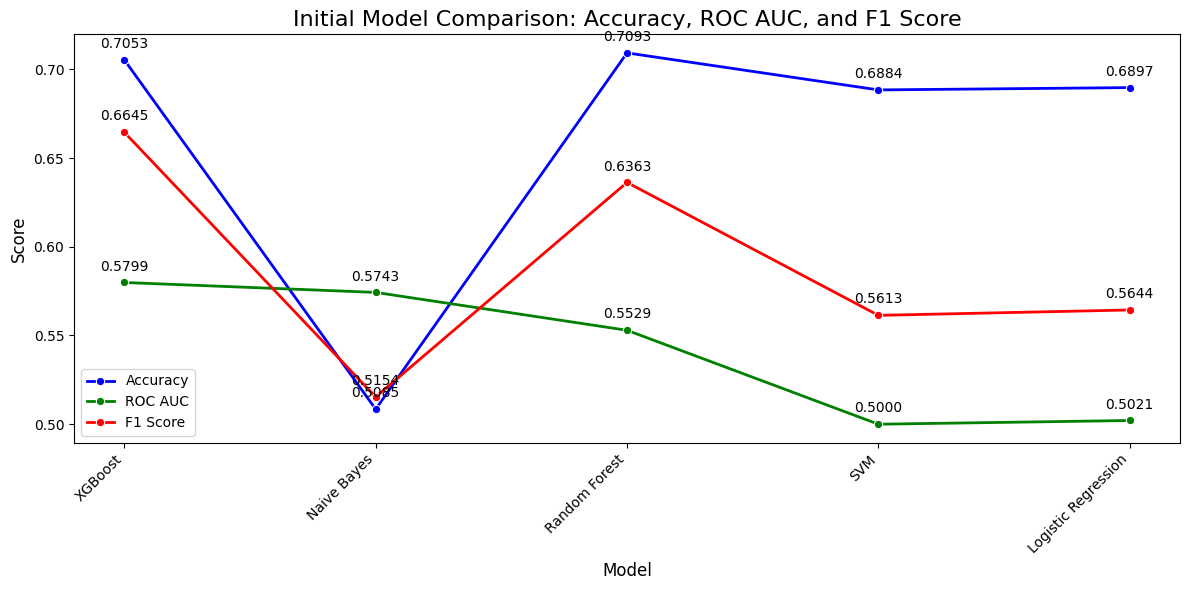

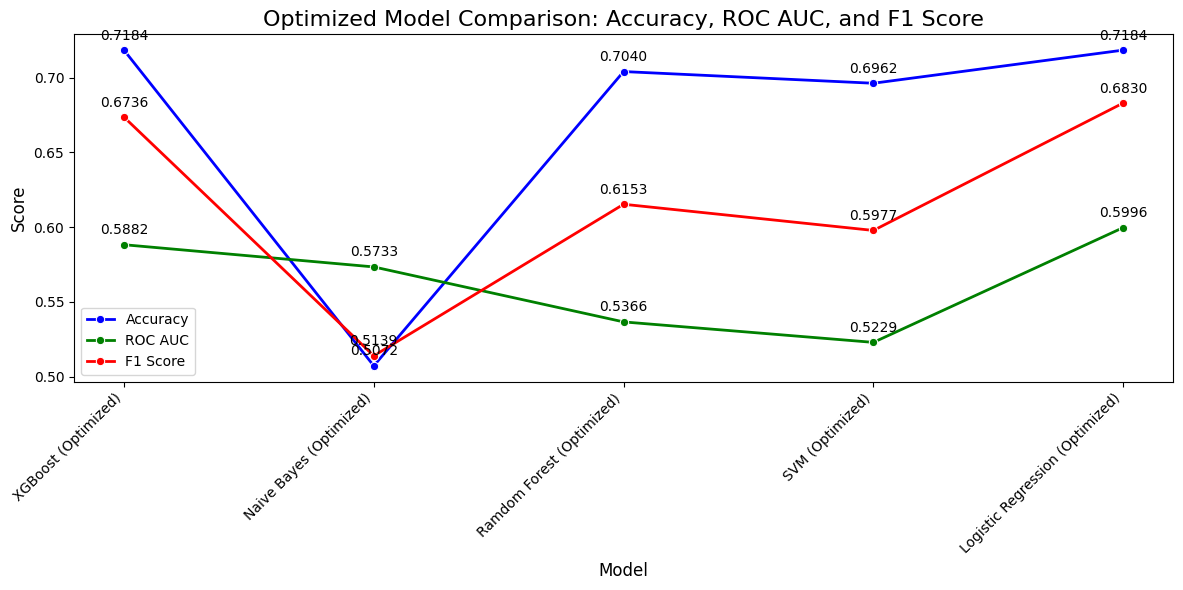

In [170]:
# Import function from Model Comparison.py file
from Model_Comparison import plot_model_comparison

# Plot the model comparison
plot_model_comparison(results_combined)